In [15]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [254]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from mesa.batchrunner import BatchRunner, BatchRunnerMP

from model import *

In [249]:
model = Pandemic(10, 10, 50, 1)

0


In [250]:
count_dict = {}
for i in range(20):
    model.step()
    agent_states = np.zeros((model.grid.width, model.grid.height))
    for cell in model.grid.coord_iter():
        cell_content, x, y = cell
        if cell_content is None:
            agent_state = 0
        else:
            if cell_content.state == "infected":
                agent_state = 2
            elif cell_content.state == "immune":
                agent_state = 3
            elif cell_content.state == "healthy":
                agent_state = 4
        agent_states[x][y] = agent_state
    count_dict[i] = agent_states

In [251]:
infected = model.datacollector.get_agent_vars_dataframe()
N_states = model.datacollector.get_model_vars_dataframe()

In [252]:
N_states

,N_infected,N_immune
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,2,0
6,2,0
7,2,0
8,2,0
9,2,0


In [213]:
cmap = ["black","orange","blue","white"]

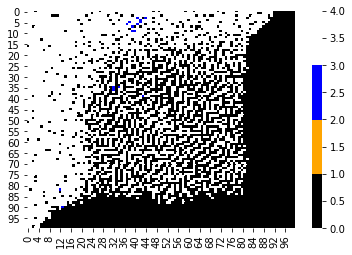

In [214]:
sns.heatmap(count_dict[i+(j*10)],cmap=ListedColormap(cmap), cbar = True)

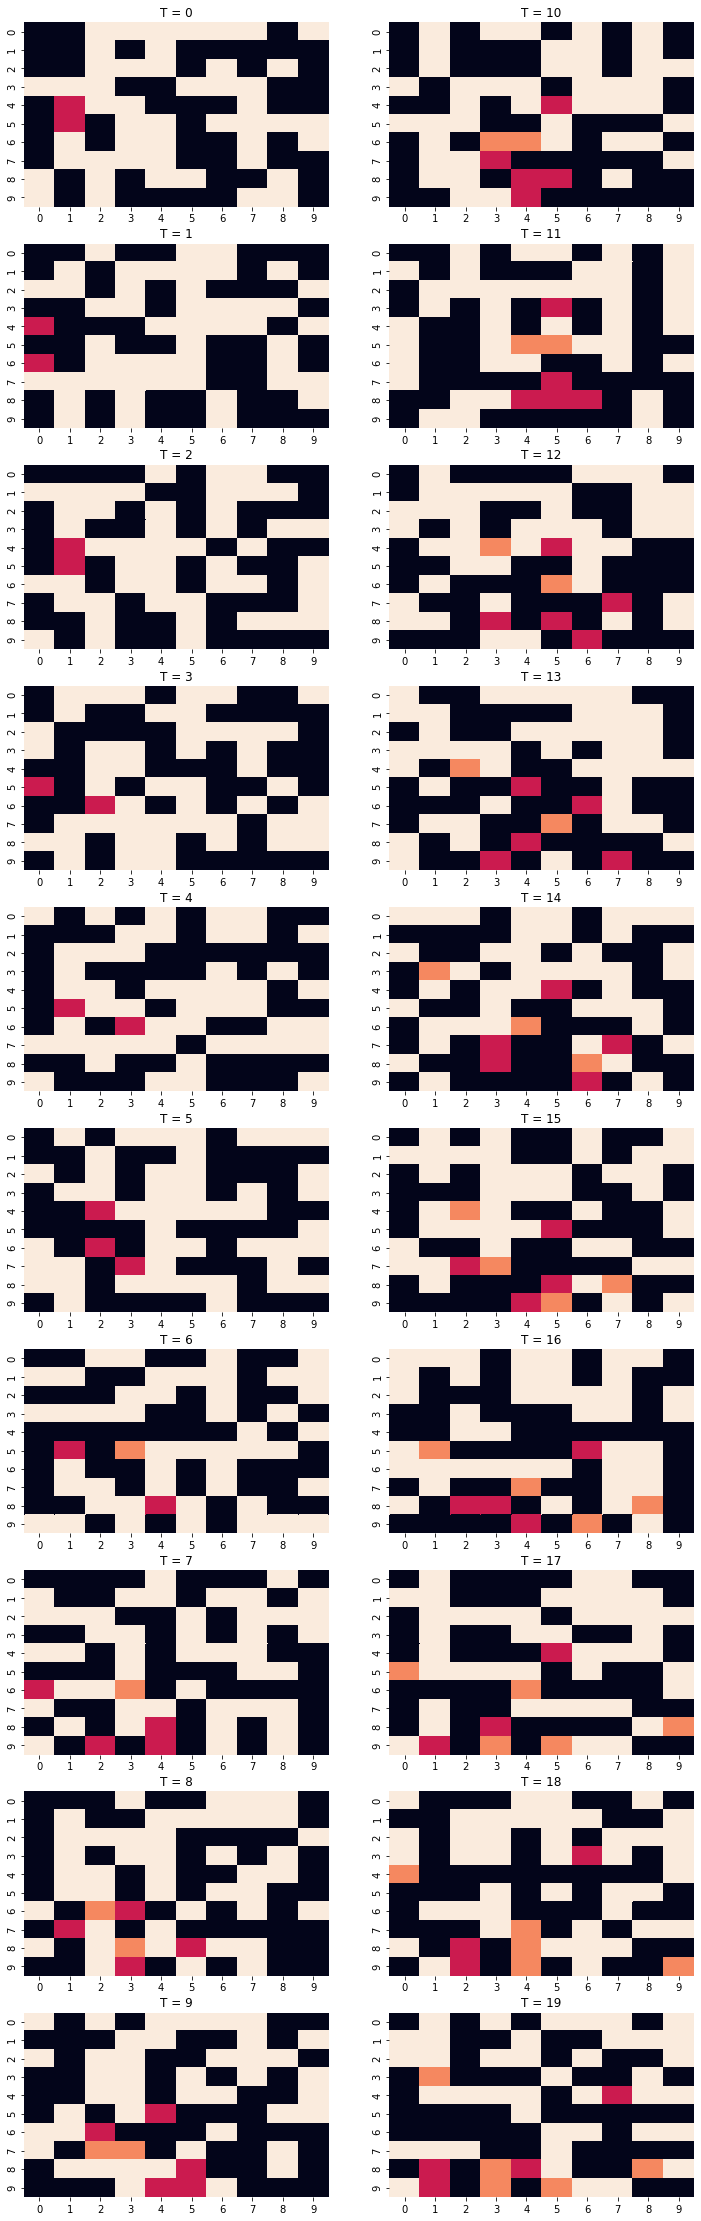

In [247]:
fig, axes  = plt.subplots(10,2,figsize=(12,40))
for j in range(0,2):
    for i in range(0,10):
        sns.heatmap(count_dict[i+(j*10)], ax = axes[i,j], cbar = False)
        axes[i,j].set_title(f'T = {i+j*10}')
plt.show()

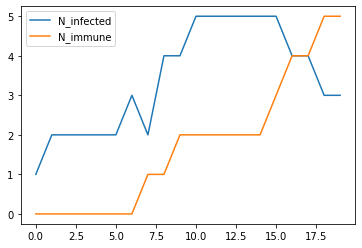

In [248]:
N_states.plot()

In [258]:
fixed_params = {
    "width":10,
    "height":10
}

variable_params = {
    "N":range(25,75,5),
    "N_initial_infected":range(1,10,1),
    "infect_prob":np.arange(0.01,0.10,0.01)
}

batch_run = BatchRunner(
    Pandemic,
    variable_params,
    fixed_params,
    iterations = 5,
    max_steps = 100,
    model_reporters = {"N_infected":get_N_infected,
                      "N_immune":get_N_immune}
)


In [261]:
run_data = batch_run.get_model_vars_dataframe()

In [262]:
run_data.head()

,N,N_initial_infected,infect_prob,Run,N_immune,N_infected,width,height
0,25,1,0.01,0,3,0,10,10
1,25,1,0.01,1,1,0,10,10
2,25,1,0.01,2,1,0,10,10
3,25,1,0.01,3,1,0,10,10
4,25,1,0.01,4,3,0,10,10
